![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Random variable distributions

Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.

## Instructions

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import power_transform

In [2]:
customers = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
customers.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 1. Get the numerical variables from our dataset.

In [3]:
customers_num = customers.select_dtypes(np.number)
customers_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

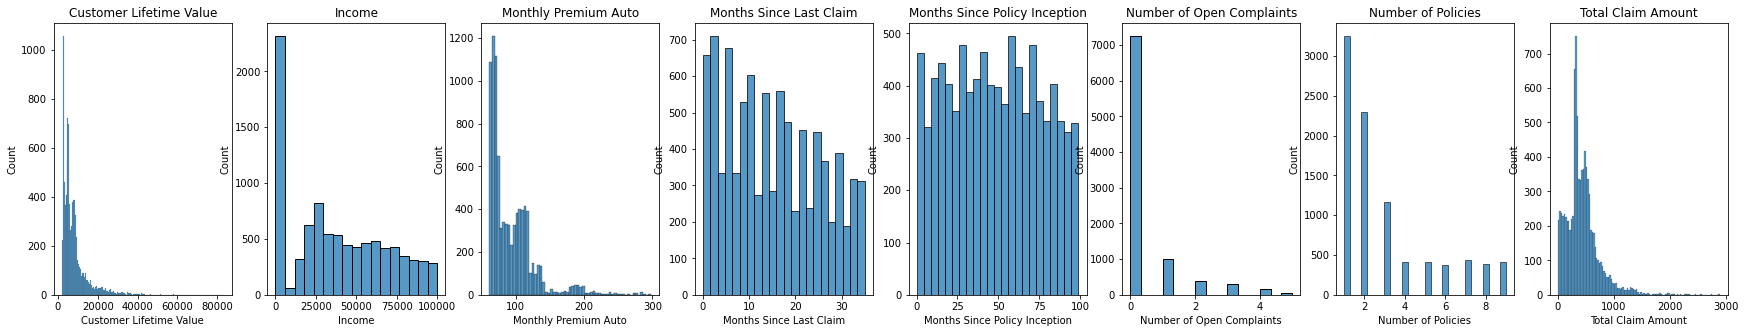

In [4]:
def hist_maker(df):
    '''Returns histplots in a single fig for each column of a given DataFrame
    
    Input: DataFrame
    Output: Histplots of all the columns'''
    
    cols = list(df.columns)
    x = len(cols)
    fig, ax = plt.subplots(1,x, figsize=(30,5))

    for col in cols:
        y = cols.index(col)
        sns.histplot(data=df, x=col, ax = ax[y])
        ax[y].set_title(col)
        
    return

hist_maker(customers_num)

Almost all columns look like exponential distributions, with `Months Since Policy Inception` being the only one too look diferent, similar to a uniform distribution.

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

#### Log-Transform

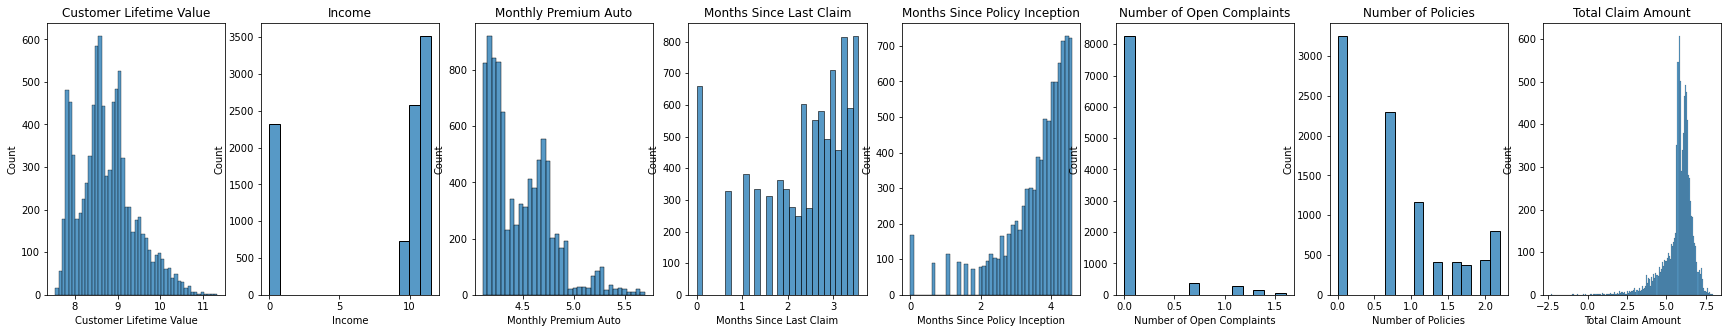

In [5]:
def log_transf(df):
    df2 = df.copy()
    
    for col in df2.columns:
        values = []
        
        for x in df2[col]:
            if (np.isfinite(x)) and (x != 0):
                x = np.log(x)
                values.append(x)
            else:
                x = x
                values.append(x)
                
        df2[col] = values
    
    return df2

hist_maker(log_transf(customers_num))

With a log-transform we are left with some closer to normal distributions on `Customer Lifetime Value` and `Total Claim Amount`, but not that much.

Rest of the columns are either the same or worse.

#### Yeo-Johnson

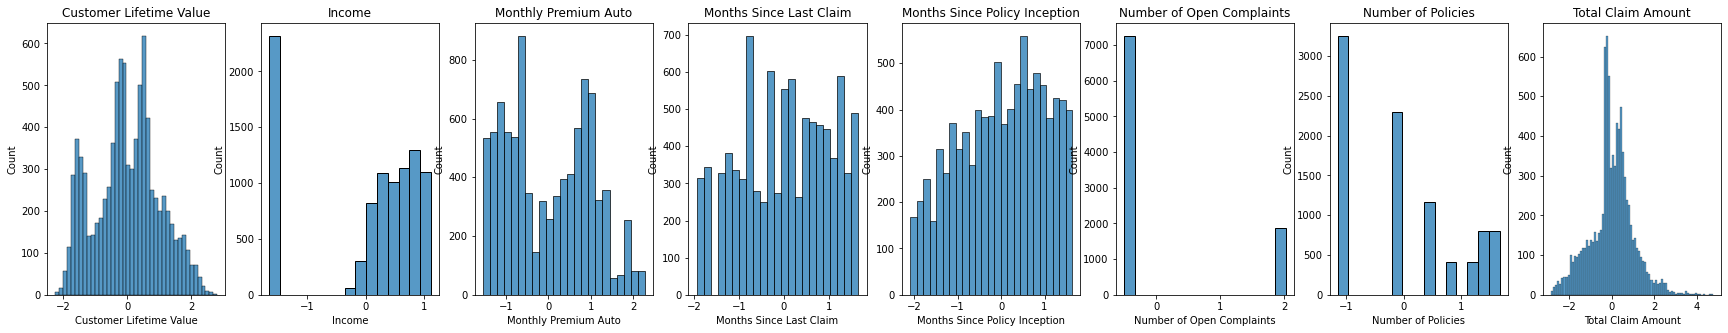

In [6]:
def yj_transf(df):
    df2 = df.copy()
    
    for col in df2.columns:
        df2[col] = power_transform(df2[col].array.reshape(-1,1))

    return df2

hist_maker(yj_transf(customers_num))

`Customer Lifetime Value` and `Total Claim Amount` are better than with the Log-Transform, rest of the columns are still weird, with possibly `Months Since Policy Inception` adquiring a left skew distribution and `Number of Open Complaints` looking like a Bernoulli distribution!

#### Box-Cox

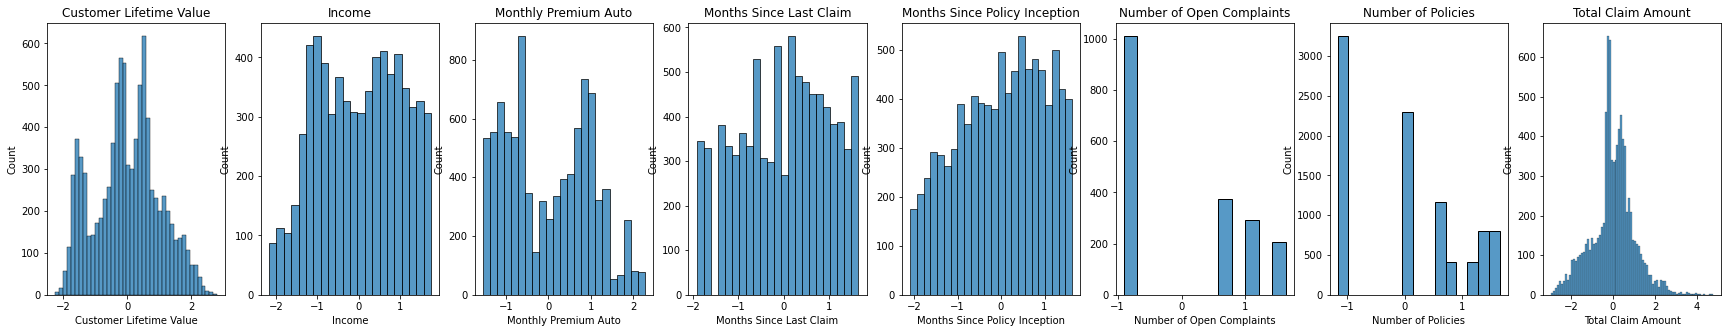

In [7]:
def bc_transf(df):
    df2 = df.copy()
    
    for col in df2.columns:
        values = []
        
        for x in df2[col]:
            if x <= 0:
                x = np.NaN
                values.append(x)
            else:
                x = x
                values.append(x)
                
        df2[col] = values
        df2[col] = power_transform(df2[col].array.reshape(-1,1), method = "box-cox")
        # df2[col] = df2[col].fillna(0)

    return df2

hist_maker(bc_transf(customers_num))

With the Box-Cox transformation we get a better `Income` column than with Yeo-Johnson and very similar distributions for the rest.

We have to take into account that some of the data is lost due to Box-Cox only admitting positive values (>0).